## SPOTIFY SONG POPULARITY DATA

Data tells us about the popualrity of song being dependent on number of factors like artrist name, track id , acousticness, danceability , duration , energy ,instruments used ,loudness and liveness of song,tempo and time_signature. Some of factors are categorical and some are non categorical. I objective of the analysis is to find how the facors are affecting the popularity of songs and which songs are more popular on important factors find using inferential and descriptive statistics.

In [1]:
#importing the required libraries and dataset
import os 
import seaborn as sns
import pandas as pd, numpy as np # For Data Manipulation
import scipy.stats as sps # For Probability & Inferential Statistics
import statsmodels.api as sm, statsmodels.formula.api as smf
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
from scipy import stats # for finding correlation value 
import plotly.graph_objects as go # data visualization
from plotly.subplots import make_subplots # data visualization
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
os.getcwd()
nwd_path=r'C:\Users\Harmeet Kaur\Desktop\python'
os.chdir(nwd_path)
os.getcwd()
Read  = open('SpotifySongPolularityAPIExtract.csv','r')
import pandas as pd
music_data = pd.read_csv('SpotifySongPolularityAPIExtract.csv')
Read.close()
print(music_data)

                  artist_name                track_id  \
0                          YG  2RM4jf1Xa9zPgMGRDiht8O   
1                          YG  1tHDG53xJNGsItRA3vfVgs   
2                       R3HAB  6Wosx2euFPMT14UXiWudMy   
3                  Chris Cooq  3J2Jpw61sO7l6Hc7qdYV91   
4                  Chris Cooq  2jbYvQCyPgX3CdmAzeVeuS   
...                       ...                     ...   
130658            Calum Scott  0cvfSKcm9VeduwyYPrxtLx   
130659           Saint Claire  43MP9F7UzvfilSrw2SqZGJ   
130660              Mike Stud  4TWlUuFk81NGUNKwndyS5Q   
130661               D Savage  5iGBXzOoRo4sBTy8wdzMyK   
130662  Banda Los Sebastianes  7LNtyuekYHiZ99UxkrfCQR   

                                            track_name  acousticness  \
0       Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj      0.005820   
1                         BAND DRUM (feat. A$AP Rocky)      0.024400   
2                                        Radio Silence      0.025000   
3                          

In [2]:
#analysing the shape of dataset 
music_data.shape

(130663, 17)

In [3]:
#checking the null and non null values in columns 
music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130663 entries, 0 to 130662
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artist_name       130663 non-null  object 
 1   track_id          130663 non-null  object 
 2   track_name        130663 non-null  object 
 3   acousticness      130663 non-null  float64
 4   danceability      130663 non-null  float64
 5   duration_ms       130663 non-null  int64  
 6   energy            130663 non-null  float64
 7   instrumentalness  130663 non-null  float64
 8   key               130663 non-null  int64  
 9   liveness          130663 non-null  float64
 10  loudness          130663 non-null  float64
 11  mode              130663 non-null  int64  
 12  speechiness       130663 non-null  float64
 13  tempo             130663 non-null  float64
 14  time_signature    130663 non-null  int64  
 15  valence           130663 non-null  float64
 16  popularity        13

In [4]:
music_data.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
count,130663.000000,130663.000000,1.306630e+05,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000
mean,0.342500,0.581468,2.126331e+05,0.569196,0.224018,5.231894,0.194886,-9.974006,0.607739,0.112015,119.473353,3.878986,0.439630,24.208988
std,0.345641,0.190077,1.231551e+05,0.260312,0.360328,3.602701,0.167733,6.544379,0.488256,0.124327,30.159636,0.514403,0.259079,19.713191
min,0.000000,0.000000,3.203000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031600,0.459000,1.639225e+05,0.396000,0.000000,2.000000,0.097500,-11.898000,0.000000,0.038900,96.014000,4.000000,0.224000,7.000000
50%,0.203000,0.605000,2.019010e+05,0.603000,0.000149,5.000000,0.124000,-7.979000,1.000000,0.055900,120.027000,4.000000,0.420000,22.000000
75%,0.636000,0.727000,2.410475e+05,0.775000,0.440000,8.000000,0.236000,-5.684000,1.000000,0.129000,139.642000,4.000000,0.638000,38.000000
max,0.996000,0.996000,5.610020e+06,1.000000,1.000000,11.000000,0.999000,1.806000,1.000000,0.966000,249.983000,5.000000,1.000000,100.000000


In [5]:
#converting the duration in milliseconds to duration in minutes to make it more comparable 
music_data['duration_ms'] = music_data['duration_ms']/60000
music_data = music_data.rename(columns = {'duration_ms':'duration_min'})

In [6]:
music_data

,artist_name,track_id,track_name,acousticness,danceability,duration_min,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,3.972883,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.1180,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,3.580000,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.3710,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,2.315217,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.3820,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,2.089683,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.6410,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,2.066933,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.9280,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130658,Calum Scott,0cvfSKcm9VeduwyYPrxtLx,Come Back Home,0.006780,0.601,3.175650,0.801,0.000,11,0.0991,-5.174,1,0.0323,131.049,4,0.2890,57
130659,Saint Claire,43MP9F7UzvfilSrw2SqZGJ,Enough for You,0.918000,0.387,3.243050,0.249,0.000,9,0.1030,-13.233,1,0.0437,94.039,4,0.3460,60
130660,Mike Stud,4TWlUuFk81NGUNKwndyS5Q,Do It,0.330000,0.717,2.319850,0.532,0.000,8,0.0997,-8.351,0,0.2060,156.977,4,0.5460,47
130661,D Savage,5iGBXzOoRo4sBTy8wdzMyK,No Smoke,0.007900,0.772,3.000217,0.510,0.000,4,0.1310,-9.670,0,0.1200,120.049,4,0.0755,50


In [7]:
music_data.columns

Index(['artist_name', 'track_id', 'track_name', 'acousticness', 'danceability',
       'duration_min', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'popularity'],
      dtype='object')

In [8]:
#bifurcating datasets in non categorical and categorical variables 
music_data_noncat = music_data[['acousticness','danceability','duration_min','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']]
music_data_cat = music_data[['key','mode','popularity','time_signature']]

In [9]:
music_data_noncat

,acousticness,danceability,duration_min,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.005820,0.743,3.972883,0.339,0.000,0.0812,-7.678,0.4090,203.927,0.1180
1,0.024400,0.846,3.580000,0.557,0.000,0.2860,-7.259,0.4570,159.009,0.3710
2,0.025000,0.603,2.315217,0.723,0.000,0.0824,-5.890,0.0454,114.966,0.3820
3,0.029400,0.800,2.089683,0.579,0.912,0.0994,-12.118,0.0701,123.003,0.6410
4,0.000035,0.783,2.066933,0.792,0.878,0.0332,-10.277,0.0661,120.047,0.9280
...,...,...,...,...,...,...,...,...,...,...
130658,0.006780,0.601,3.175650,0.801,0.000,0.0991,-5.174,0.0323,131.049,0.2890
130659,0.918000,0.387,3.243050,0.249,0.000,0.1030,-13.233,0.0437,94.039,0.3460
130660,0.330000,0.717,2.319850,0.532,0.000,0.0997,-8.351,0.2060,156.977,0.5460
130661,0.007900,0.772,3.000217,0.510,0.000,0.1310,-9.670,0.1200,120.049,0.0755


In [10]:
music_data_cat

,key,mode,popularity,time_signature
0,1,1,15,4
1,8,1,0,4
2,9,0,56,4
3,5,0,0,4
4,7,1,0,4
...,...,...,...,...
130658,11,1,57,4
130659,9,1,60,4
130660,8,0,47,4
130661,4,0,50,4


In [46]:
music_data.columns

Index(['artist_name', 'track_id', 'track_name', 'acousticness', 'danceability',
       'duration_min', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'popularity'],
      dtype='object')

In [11]:
#analysisng the non cat dataset in descriptive statistics as categorical data descriptive will be less useful and meaningful
import statsmodels as sm 
music_data_noncat_stats = sm.stats.descriptivestats.Description(music_data_noncat).frame
music_data_cat_stats = sm.stats.descriptivestats.Description(music_data_cat).frame 
music_data_noncat_stats

,acousticness,danceability,duration_min,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
nobs,130663.000000,130663.000000,1.306630e+05,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,1.306630e+05,130663.000000
missing,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
mean,0.342500,0.581468,3.543885e+00,0.569196,0.224018,0.194886,-9.974006,0.112015,1.194734e+02,0.439630
std_err,0.000956,0.000526,5.678383e-03,0.000720,0.000997,0.000464,0.018105,0.000344,8.343529e-02,0.000717
upper_ci,0.344374,0.582499,3.555015e+00,0.570607,0.225972,0.195796,-9.938521,0.112689,1.196369e+02,0.441035
lower_ci,0.340626,0.580438,3.532756e+00,0.567785,0.222065,0.193977,-10.009490,0.111341,1.193098e+02,0.438226
std,0.345641,0.190077,2.052584e+00,0.260312,0.360328,0.167733,6.544379,0.124327,3.015964e+01,0.259079
iqr,0.604400,0.268000,1.285417e+00,0.379000,0.440000,0.138500,6.214000,0.090100,4.362800e+01,0.414000
iqr_normal,0.448042,0.198669,9.528808e-01,0.280953,0.326172,0.102670,4.606445,0.066791,3.234148e+01,0.306899
mad,0.302701,0.154676,1.050321e+00,0.215290,0.308645,0.118694,4.763440,0.088318,2.421827e+01,0.218971


    count  percentage
1   15348        12.0
0   14972        11.0
7   13930        11.0
2   12363         9.0
9   12029         9.0
5   10816         8.0
11  10341         8.0
8    9299         7.0
10   9298         7.0
4    9045         7.0
6    8907         7.0
3    4315         3.0


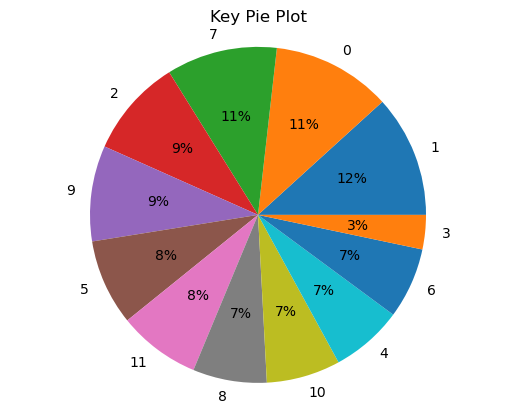

In [12]:
#categorical data analysis 
key_stats = pd.concat([music_data['key'].value_counts(), music_data['key'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count', 'percentage'))
print(key_stats)

plt.pie(key_stats['count'], labels=key_stats.index, autopct='%0.0f%%') 
plt.axis('equal')
plt.title('Key Pie Plot')
plt.show()
#highest popular keys are 0 , 1  and 7

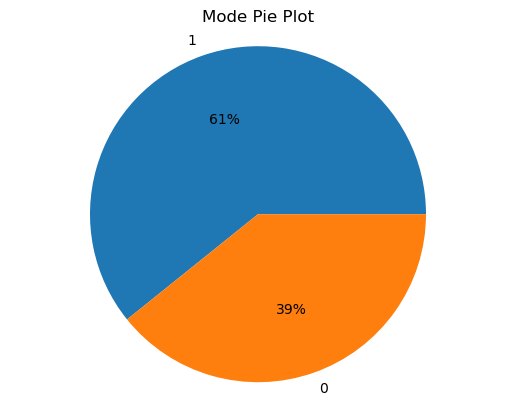

In [13]:
mode_stats = pd.concat([music_data['mode'].value_counts(),music_data['mode'].value_counts(normalize = True).mul(100).round(0)],axis = 1 , keys = ('count','percenatge'))
mode_stats
plt.pie(mode_stats['count'], labels=mode_stats.index, autopct='%0.0f%%') 
plt.axis('equal')
plt.title('Mode Pie Plot')
plt.show()
#this shows that mode 1 is more popular than mode 0 

In [14]:
popularity_stats = pd.concat([music_data['popularity'].value_counts(),music_data['popularity'].value_counts(normalize = True).mul(100).round(0)],axis = 1 , keys = ('count','percenatge'))
popularity_stats
#its seems like there are many songs with lower rating on popualrity and very few on higher rating

,count,percenatge
0,18889,14.0
1,3217,2.0
19,2537,2.0
22,2525,2.0
2,2517,2.0
...,...,...
95,6,0.0
93,6,0.0
98,4,0.0
97,1,0.0


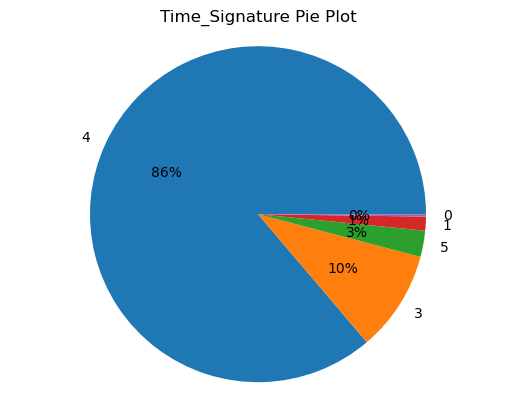

In [15]:
time_signature_stats = pd.concat([music_data['time_signature'].value_counts(),music_data['time_signature'].value_counts(normalize = True).mul(100).round(0)],axis = 1 , keys = ('count','percenatge'))
time_signature_stats
plt.pie(time_signature_stats['count'], labels=time_signature_stats.index, autopct='%0.0f%%') 
plt.axis('equal')
plt.title('Time_Signature Pie Plot')
plt.show()
#4th time_singature songs are the most popular songs 

## Analysing the variables using inferential Statistics 

In [13]:
mean_acousticness = np.mean(music_data.acousticness);mean_acousticness
mean_acousticness = np.round(mean_acousticness).round(2)
std_acousticness = np.std(music_data.acousticness);std_acousticness
# Probability of a music having acousticness < 0.25
a_lt25 = sps.norm.cdf(0.25, loc=mean_acousticness, scale=std_acousticness).round(2); a_lt25
# Probability of a music having acousticness < 0.5
a_lt50 = sps.norm.cdf(0.5, loc=mean_acousticness, scale=std_acousticness).round(2); a_lt50

0.93

In [20]:
mean_duration_min = np.mean(music_data.duration_min);mean_duration_min
std_duration_min = np.std(music_data.duration_min);std_duration_min
# Probability of a music having duration in minutes < 1.5 mins
a_lt15 = sps.norm.cdf(1.5, loc=mean_duration_min, scale=std_duration_min).round(2); a_lt15
# Probability of a music having duration in minutes < 5 mins 
a_lt5 = sps.norm.cdf(5, loc=mean_duration_min, scale=std_duration_min).round(2); a_lt5

0.76

In [24]:
mean_liveness = np.mean(music_data.liveness);mean_liveness
std_liveness = np.std(music_data.liveness);std_liveness
#Probability of a music having liveness < 0.50
a_lt50 = sps.norm.cdf(0.50, loc=mean_liveness, scale=std_liveness).round(2); a_lt50

0.97

In [28]:
mean_loudness = np.mean(music_data.loudness);mean_loudness
std_loudness = np.std(music_data.loudness);std_loudness
#Probability of a music having loudness < 0
a_lt7 = sps.norm.cdf(7, loc=mean_loudness, scale=std_loudness).round(2); a_lt7

1.0

In [43]:
mean_tempo = np.mean(music_data.tempo);mean_tempo
std_tempo = np.std(music_data.tempo);std_tempo
#Probability of a music having loudness < 0
a_lt100 = sps.norm.cdf(100, loc=mean_tempo, scale=std_tempo).round(2); a_lt100
p95 = sps.norm.ppf(.95, loc=mean_tempo, scale=std_tempo).round(2); p95

169.08

In [44]:
mean_popularity= np.mean(music_data.popularity);mean_popularity
std_popularity = np.std(music_data.popularity);std_popularity
#popularity mark at 95 percent 
a_p95 = sps.norm.ppf(.95, loc=mean_tempo, scale=std_tempo).round(2); a_p95

169.08

In [45]:
mean_valence = np.mean(music_data.valence);mean_valence
std_valence  = np.std(music_data.valence);std_valence
#valence at 95% of probability
p95 = sps.norm.ppf(.95, loc=mean_valence, scale=std_valence).round(2); p95

0.87

In [21]:
mean_instrumentalness= np.mean(music_data.instrumentalness);mean_instrumentalness
std_instrumentalness = np.std(music_data.instrumentalness);std_instrumentalness

0.3603265475382259

In [22]:
#normality chek for tempo
normality_test_shapiro = sps.shapiro(music_data['tempo'])
normality_test_shapiro
#the p-value is 0.0, which means that the test statistic is so extreme that it falls outside the range of values that would be expected if the data came from a normal distribution. 
#Therefore, we reject the null hypothesis that the data comes from a normal distribution.

C:\Users\Harmeet Kaur\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning:

p-value may not be accurate for N > 5000.



ShapiroResult(statistic=0.9894881844520569, pvalue=0.0)

In [24]:
music_data_minor = music_data[music_data['mode'] == 0] 
music_data_minor
music_data_major = music_data[music_data['mode'] == 1]
music_data_major

,artist_name,track_id,track_name,acousticness,danceability,duration_min,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,3.972883,0.339,0.000000,1,0.0812,-7.678,1,0.4090,203.927,4,0.1180,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,3.580000,0.557,0.000000,8,0.2860,-7.259,1,0.4570,159.009,4,0.3710,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,2.066933,0.792,0.878000,7,0.0332,-10.277,1,0.0661,120.047,4,0.9280,0
7,G Herbo,13Mf2ZBpfNkgWJowvM5hXh,Bon appétit,0.115000,0.885,3.030633,0.348,0.000000,9,0.1070,-12.569,1,0.4510,142.111,4,0.1800,0
8,34 Feet,7BQaRTHk44DkMhIVNcXy2D,Among - Original mix,0.000058,0.740,2.066933,0.472,0.847000,8,0.0959,-9.008,1,0.0551,120.034,4,0.6220,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130655,Atreyu,1RAT7pGtFKGsVe38SDKvKo,Anger Left Behind,0.056700,0.416,3.392450,0.987,0.000145,0,0.0853,-3.333,1,0.2100,155.045,4,0.2580,54
130656,Echos,6Tgd0DhWYzCWrwZZB6BPNw,Revival,0.668000,0.211,4.651167,0.284,0.000111,1,0.1050,-10.317,1,0.0385,83.905,4,0.0638,51
130658,Calum Scott,0cvfSKcm9VeduwyYPrxtLx,Come Back Home,0.006780,0.601,3.175650,0.801,0.000000,11,0.0991,-5.174,1,0.0323,131.049,4,0.2890,57
130659,Saint Claire,43MP9F7UzvfilSrw2SqZGJ,Enough for You,0.918000,0.387,3.243050,0.249,0.000000,9,0.1030,-13.233,1,0.0437,94.039,4,0.3460,60


In [25]:
mean_test_ttest = sps.ttest_ind(music_data_minor.tempo,music_data_major.tempo,equal_var = False)
mean_test_ttest
#mean of both are statistically equal

Ttest_indResult(statistic=0.09061782303151807, pvalue=0.9277964314702841)

In [26]:
median_test_mannwhitney = sps.mannwhitneyu(music_data_minor.tempo,music_data_major.tempo)
median_test_mannwhitney

MannwhitneyuResult(statistic=2038895239.0, pvalue=0.5599239255344888)

The p-value is 0.5599239255344888, which means that there is not enough evidence to reject the null hypothesis at the 5% significance level.
Therefore, we can conlude that there median values are statistically significant

In [27]:
#categorization of data on basis of time signature 
music_data_0TS = music_data[music_data.time_signature == 0]
music_data_1TS = music_data[music_data.time_signature == 1]
music_data_3TS = music_data[music_data.time_signature == 3]
music_data_4TS = music_data[music_data.time_signature == 4]
music_data_5TS = music_data[music_data.time_signature == 5]

<Axes: title={'center': 'tempo'}, xlabel='time_signature'>

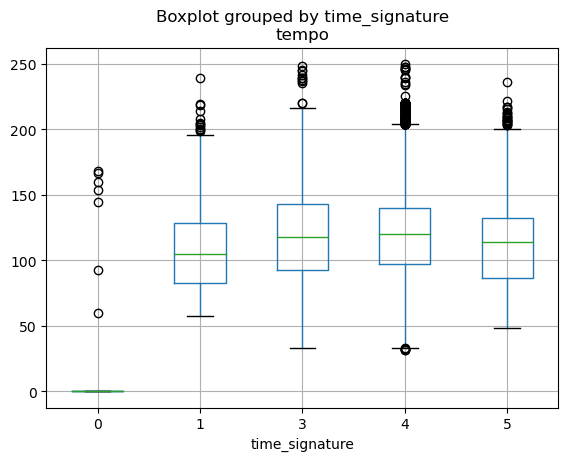

In [28]:
music_data.boxplot('tempo',by = 'time_signature')

In [29]:
mean_test_anova_scipy = sps.f_oneway(music_data_0TS.tempo, music_data_1TS.tempo,music_data_3TS.tempo,music_data_4TS.tempo,music_data_5TS.tempo) # ANOVA
mean_test_anova_scipy

F_onewayResult(statistic=1257.02936763883, pvalue=0.0)

The p-value represents the probability of observing a test statistic as extreme as the one calculated from the data, assuming the null hypothesis that the means of all the groups are equal. In this case, the p-value is 0.0, which means that the test statistic is so extreme that it falls outside the range of values that would be expected if the null hypothesis were true. Therefore, we reject the null hypothesis and conclude that the means of at least one group are significantly different from the means of the other groups.

In [30]:
mean_pairwise_compare_scipy = sps.tukey_hsd(music_data_0TS.tempo, music_data_1TS.tempo,music_data_3TS.tempo,music_data_4TS.tempo,music_data_5TS.tempo) # Tukey HSD
print(mean_pairwise_compare_scipy)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)   -105.625     0.000  -110.677  -100.573
 (0 - 2)   -116.768     0.000  -121.491  -112.044
 (0 - 3)   -116.909     0.000  -121.584  -112.234
 (0 - 4)   -110.363     0.000  -115.239  -105.487
 (1 - 0)    105.625     0.000   100.573   110.677
 (1 - 2)    -11.143     0.000   -13.202    -9.083
 (1 - 3)    -11.284     0.000   -13.229    -9.339
 (1 - 4)     -4.738     0.000    -7.126    -2.350
 (2 - 0)    116.768     0.000   112.044   121.491
 (2 - 1)     11.143     0.000     9.083    13.202
 (2 - 3)     -0.141     0.987    -0.898     0.615
 (2 - 4)      6.405     0.000     4.827     7.983
 (3 - 0)    116.909     0.000   112.234   121.584
 (3 - 1)     11.284     0.000     9.339    13.229
 (3 - 2)      0.141     0.987    -0.615     0.898
 (3 - 4)      6.546     0.000     5.120     7.973
 (4 - 0)    110.363     0.000   105.487   115.239
 (4 - 1)      4.738     0.000   

Inference : Average tempo of songs having time signature = {0,1,2,3,4} are Different (p-value < 5%) | tempo of song with time signature =3 > tempo of song with time signature =2>tempo of song with time signature =4> tempo of song with time signature =1> tempo of song with time signature =0 
while looking at the row (0 - 1), we can see that the mean of group 0 is significantly different from the mean of group 1, with a difference in means of -105.625, a p-value of 0.000, and a 95% confidence interval for the difference in means of -110.677 to -100.573. Similarly, we can see that the means of groups 0, 1, 2, and 3 are all significantly different from the mean of group 4, with p-values of 0.000 and differences in means ranging from -6.546 to -110.363.

In [47]:
import statsmodels.api as sm
anova_model = smf.ols('popularity ~ time_signature', data=music_data).fit()
mean_test_anova_statsmodels = sm.stats.anova_lm(anova_model, typ=2) # ANOVA
print(anova_model)
print(mean_test_anova_statsmodels)

                      sum_sq        df           F         PR(>F)
time_signature  2.141312e+05       1.0  553.347775  4.230108e-122
Residual        5.056241e+07  130661.0         NaN            NaN


Doing the anova test to test the mean between popularity and time signature of songs. The above result is the output of a linear regression analysis, with "time_signature" as the predictor variable and popularity as the response variable.

The above the table shows that the predictor variable "time_signature" has a significant effect on the response variable, as indicated by a large F-statistic and a very small p-value (less than 0.05). This means that "time_signature" is a significant predictor of the popularity of song, and we can reject the null hypothesis that the regression coefficient for "time_signature" is zero.

In [32]:
mean_pairwise_compare_statsmodels = sm.stats.multicomp.pairwise_tukeyhsd(music_data.tempo, music_data.time_signature) # Tukey HSD
print(mean_pairwise_compare_statsmodels)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     0      1 105.6252    0.0  100.573 110.6773   True
     0      3 116.7679    0.0 112.0443 121.4915   True
     0      4 116.9091    0.0 112.2341 121.5841   True
     0      5 110.3629    0.0  105.487 115.2388   True
     1      3  11.1427    0.0   9.0834  13.2021   True
     1      4  11.2839    0.0   9.3386  13.2292   True
     1      5   4.7378    0.0   2.3496   7.1259   True
     3      4   0.1412 0.9865  -0.6154   0.8978  False
     3      5   -6.405    0.0  -7.9834  -4.8266   True
     4      5  -6.5462    0.0  -7.9726  -5.1197   True
------------------------------------------------------


The Tukey HSD test was performed with a family-wise error rate (FWER) of 0.05 to compare the means of different groups. The results suggest that there are significant differences between the means of all groups except for the comparison between group 3 and group 4. All other pairwise comparisons rejected the null hypothesis and indicate that there is a statistically significant difference between the means of the two groups being compared.

In [33]:
# Model 1 : mpg = b0 + b1*disp + b2*hp + b3*wt + e
linear_regression_model1 = smf.ols('popularity ~ acousticness + liveness + loudness', data=music_data).fit()
linear_regression_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     2926.
Date:                Mon, 27 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:33:09   Log-Likelihood:            -5.7070e+05
No. Observations:              130663   AIC:                         1.141e+06
Df Residuals:                  130659   BIC:                         1.141e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       32.5640      0.117    277.417      0.000      32.334      32.794
acousticness     2.5108      0.192     13.068      0.000       2.134       2.887
liveness        -5.1409      0.316    -16.251      0.000      -5.761      -4.521
loudness         0.8235      0.010     81.405      0.000       0.804       0.843
==============================================================================
Omnibus:                     6478.099   Durbin-Watson:                   0.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6421.932
Skew:                           0.500   Prob(JB):                         0.00
Kurtosis:                       2.577   Cond. No.                         73.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model 1 Significant | acousticness,liveness & loudness are Negative & Significant | Rsq (adj) = 0.61

In [34]:
linear_regression_model2 = smf.ols('popularity ~ acousticness + liveness + C(time_signature)', data=music_data).fit()
linear_regression_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     445.3
Date:                Mon, 27 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:33:11   Log-Likelihood:            -5.7362e+05
No. Observations:              130663   AIC:                         1.147e+06
Df Residuals:                  130656   BIC:                         1.147e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 16.1519      1.138     14.198      0.000      13.922      18.382
C(time_signature)[T.1]     6.3055      1.222      5.158      0.000       3.910       8.701
C(time_signature)[T.3]     8.1054      1.143      7.090      0.000       5.865      10.346
C(time_signature)[T.4]    11.4948      1.132     10.157      0.000       9.277      13.713
C(time_signature)[T.5]     7.4877      1.179      6.348      0.000       5.176       9.799
acousticness              -5.9152      0.163    -36.350      0.000      -6.234      -5.596
liveness                  -4.5476      0.324    -14.019      0.000      -5.183      -3.912
==============================================================================
Omnibus:                     7693.453   Durbin-Watson:                   0.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7749.579
Skew:                           0.553   Prob(JB):                         0.00
Kurtosis:                       2.552   Cond. No.                         65.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P value shows the model is sognoficant but depiciting only 2 per of relationship. Thus, it shows other variables are also important in depiciting the variability in popularity 

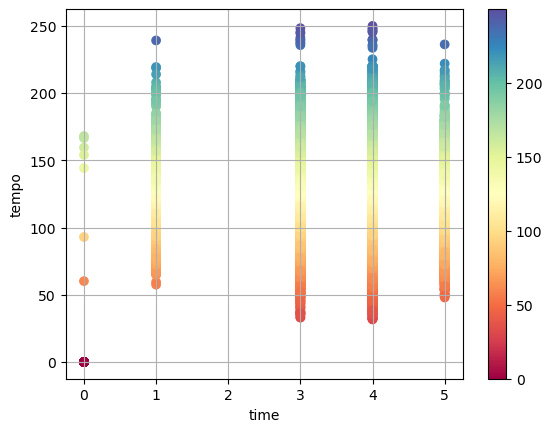

In [35]:
plt.scatter(music_data.time_signature, music_data.tempo, c=music_data.tempo, cmap='Spectral') # c = color, cmap = color map
plt.xlabel('time')
plt.ylabel('tempo')
plt.colorbar()
plt.grid()
plt.show()

count    130663.000000
mean         24.208988
std          19.713191
min           0.000000
25%           7.000000
50%          22.000000
75%          38.000000
max         100.000000
Name: popularity, dtype: float64

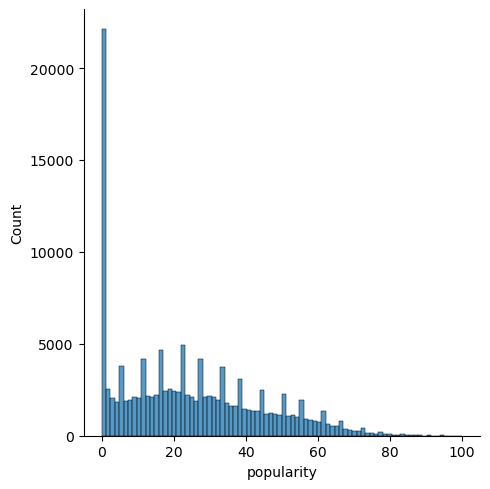

In [36]:
import seaborn as sns
sns.displot(data=music_data, x='popularity')
music_data['popularity'].describe()

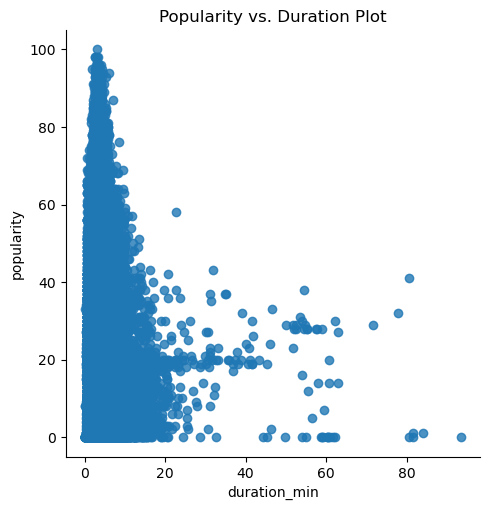

In [38]:
sns.lmplot(data=music_data, x='duration_min', y='popularity', fit_reg=False)

plt.title('Popularity vs. Duration Plot')
plt.show()

The plot shows that most of the songs have duration less than 20. 
To better understand the relationship between song duration and popularity, we can limit the duration variable to 20 minutes.

Text(0.5, 1.0, 'Popularity vs. Key and Time Signature')

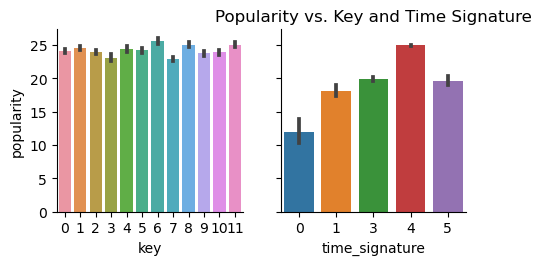

In [39]:
g = sns.PairGrid(data=music_data, x_vars=['key','time_signature'], y_vars=['popularity'])
g.map(sns.barplot)

plt.title('Popularity vs. Key and Time Signature')

Based on the plot, the most popular song key is 6, followed by 8 and 11. In terms of time signature, the most popular is 4.

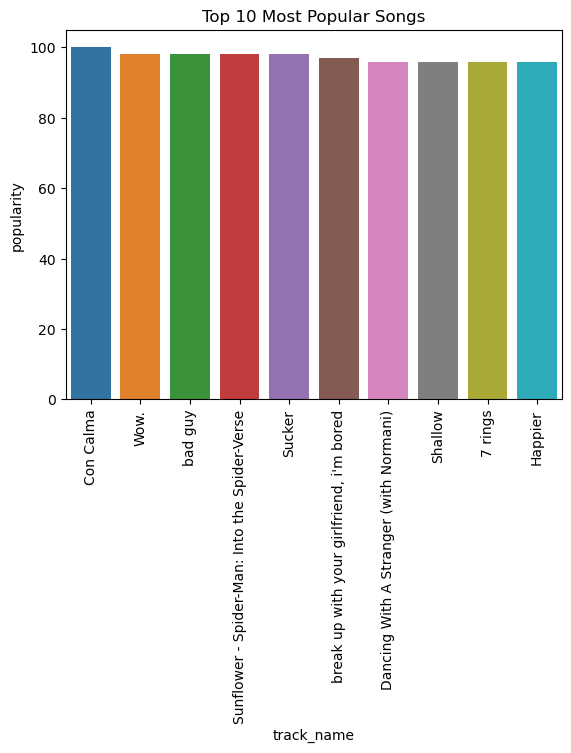

In [40]:
popular_song = music_data.sort_values("popularity", ascending=False)

# select top 10 rows of sorted data
top10_songs = popular_song[:10]

# create bar plot of top 10 fares
sns.barplot(x="track_name", y="popularity", data=top10_songs)

# display plot
plt.xticks(rotation=90)
plt.title('Top 10 Most Popular Songs')
plt.show()

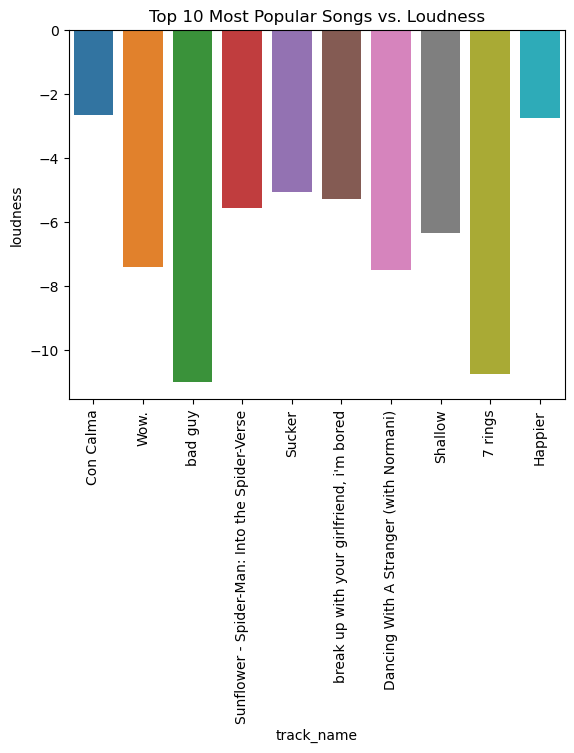

In [41]:
p_l=sns.barplot(x="track_name", y="loudness", data=top10_songs)

p_l=plt.xticks(rotation=90)
p_l=plt.title('Top 10 Most Popular Songs vs. Loudness')
p_l=plt.show()

We found out that the top 10 most popular songs in the dataset have a loudness greater than -12 dB, meaning that high loudness is a common trait of popular songs.

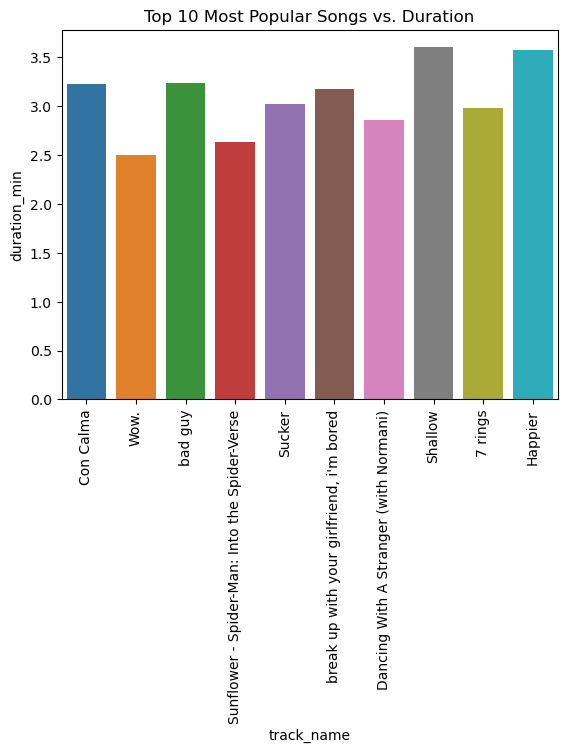

In [42]:
bar= sns.barplot(x="track_name", y="duration_min", data=top10_songs)

bar=plt.xticks(rotation=90)
bar=plt.title('Top 10 Most Popular Songs vs. Duration')
bar=plt.show()

The duration of the top 10 most popular songs in the dataset ranges from 2.5 to 4 minutes, which aligns with our previous findings on the relationship between song popularity and duration.